In [22]:
# Imorting the required libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
# Reading the data from given csv file to form train data for model.
dataset = pd.read_csv('trueData.csv')

In [29]:
dataset

,id,x,y,z,result,truth
0,26513,0.164699,0.237391,0.962274,19.390990,1
1,59567,0.731908,0.007765,0.248494,1.804186,1
2,77881,0.622814,0.781295,0.216636,4.197758,1
3,10550,0.178394,0.419923,0.833925,1.153391,1
4,39361,0.228182,0.774262,0.346077,0.801336,1
...,...,...,...,...,...,...
39995,77704,0.624779,0.881381,0.283398,3.724004,0
39996,58066,0.990125,0.759182,0.810888,34.317423,1
39997,92394,0.565034,0.196830,0.535584,1.451402,1
39998,91852,0.783600,0.974875,0.917486,17.751716,1


In [30]:
dataset.isna().sum()

id        0
x         0
y         0
z         0
result    0
truth     0
dtype: int64

<AxesSubplot:>

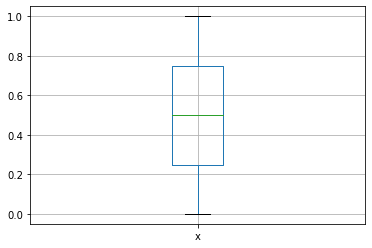

In [36]:
dataset.boxplot(column = ['x'])

<AxesSubplot:>

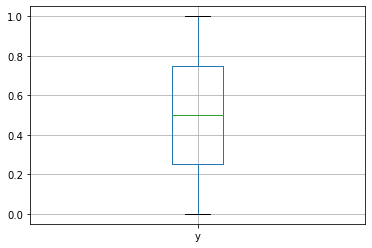

In [37]:
dataset.boxplot(column = ['y'])

<AxesSubplot:>

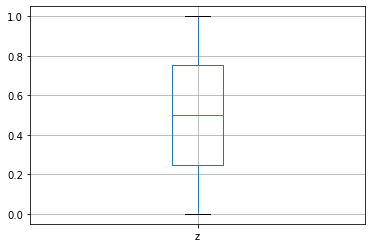

In [38]:
dataset.boxplot(column = ['z'])
# Thus none of the input x, y, z has the outliers.

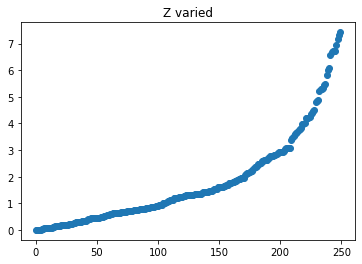

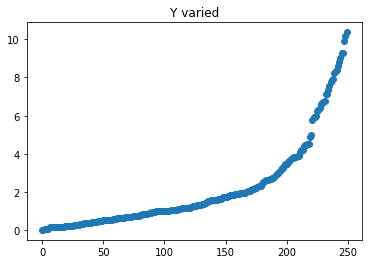

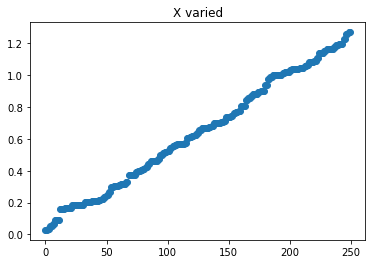

In [41]:
# Now lets see how the x, y, z, values varies.

train = pd.read_csv('trueData.csv')
train_f = pd.read_csv('trueData.csv')

train = train[train.truth == 1]
train_f =  train_f[train_f.truth == 0]


X = train.iloc[:,1:4].values
Y = train.iloc[:,4].values

X[0,0]

x= 0.5
y = 0.5
z = 0.5

# Variation of z when all other are kept constant.
arr = [[],[],[], []]
for i in range(31948):
    x_c = X[i,0]
    y_c = X[i,1]
    if abs(x-x_c) < 0.05 and abs(y-y_c) <0.05:
        arr[0].append(x_c)
        arr[1].append(y_c)
        arr[2].append(X[i,2])
        arr[3].append(Y[i])
plt.scatter( range(250), sorted(arr[3])[:250])
plt.title('Z varied')
plt.show()


# Variation of y when all other are kept constant.
arr = [[],[],[], []]
for i in range(31948):
    x_c = X[i,0]
    z_c = X[i,2]
    if abs(x-x_c) < 0.05 and abs(z-z_c) <0.05:
        arr[0].append(x_c)
        arr[2].append(z_c)
        arr[1].append(X[i,1])
        arr[3].append(Y[i])

plt.scatter( range(250), sorted(arr[3])[:250])
plt.title('Y varied')
plt.show()

# Variation of x when all other are kept contant.
for i in range(31948):
    y_c = X[i,0]
    z_c = X[i,2]
    if abs(y-y_c) < 0.05 and abs(z-z_c) <0.05:
        arr[0].append(X[i,0])
        arr[2].append(z_c)
        arr[1].append(y_c)
        arr[3].append(Y[i])

plt.scatter( range(250), sorted(arr[3])[:250])
plt.title('X varied')
plt.show()

In [35]:
X_train

array([[1.64698784e-01, 2.37390979e-01, 9.62274370e-01, 1.93909897e+01],
       [7.31908230e-01, 7.76480500e-03, 2.48494472e-01, 1.80418557e+00],
       [6.22813753e-01, 7.81295339e-01, 2.16635599e-01, 4.19775782e+00],
       ...,
       [5.65033852e-01, 1.96830007e-01, 5.35584231e-01, 1.45140182e+00],
       [7.83600202e-01, 9.74874911e-01, 9.17486118e-01, 1.77517160e+01],
       [5.01910900e-01, 5.27054539e-01, 8.97448351e-01, 1.64520239e+01]])

In [7]:
# Forming the test data to do final prediction.
testdata = pd.read_csv('testData.csv')
X_test = testdata.iloc[:, :-1].values

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
# Training the data with the help of SVC model.
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [10]:
# Predicting the required predictions.
y_pred=classifier.predict(X_test)

In [11]:
id_data = testdata.iloc[:, 0].values
dataset_new = pd.DataFrame({"id" : id_data, "truth": y_pred})
dataset_new.to_csv('linearSVM.csv')